In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import plotly
import plotly.graph_objs as go
# mode offline
plotly.offline.init_notebook_mode()

import scipy as sp
from scipy.interpolate import SmoothBivariateSpline
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator

# Load datas

In [15]:
fdata = "../assets/data/rhum.csv"
df = pd.read_csv(fdata, sep=";", na_values=["/"], index_col=0, usecols=range(11))
df

m eau (g)  m EtOH (g)  m sucre (g)  m totale (g)    %eau   %EtOH  \
n° solution                                                                     
1               15.047       5.091        4.997        25.135  59.865  20.255   
2               14.042       6.005        5.002        25.049  56.058  23.973   
3               13.007       6.996        5.000        25.003  52.022  27.981   
4               12.037       8.013        5.011        25.061  48.031  31.974   
5               11.101       8.931        4.968        25.000  44.404  35.724   
6               10.056      10.042        5.006        25.104  40.057  40.002   
7                9.008      11.006        4.993        25.007  36.022  44.012   
8                8.028      12.003        5.007        25.038  32.063  47.939   
9               10.036      13.003        2.014        25.053  40.059  51.902   
10              10.022      12.018        3.015        25.055  40.000  47.966   
11              10.077      10.988        3.998        25.063  40.207  43.842   
12               9.995       9.007        6.014        25.016  39.954  36.005   
13               9.996       8.009        7.007        25.012  39.965  32.021   
14              10.048       7.078        8.004        25.130  39.984  28.166   
15              13.023      10.072        2.019        25.114  51.856  40.105   
16              12.022      10.031        3.002        25.055  47.982  40.036   
17              11.061       9.979        4.013        25.053  44.150  39.832   
18               9.094      10.085        6.084        25.263  35.997  39.920   
19               8.037      10.015        6.999        25.051  32.083  39.978   

             %sucre  pouvoir rotatoire  Indice de réfraction  densité  
n° solution                                                            
1            19.881              13.20                 1.375    1.169  
2            19.969              14.00                 1.377    1.157  
3            19.998              13.80                 1.379    1.143  
4            19.995              13.05                 1.381    1.129  
5            19.872                NaN                 1.382    1.115  
6            19.941                NaN                 1.382    1.102  
7            19.966                NaN                 1.381    1.089  
8            19.998                NaN                 1.383    1.077  
9             8.039               4.85                 1.369    0.945  
10           12.034               9.50                 1.373    0.992  
11           15.952                NaN                 1.378    1.044  
12           24.041                NaN                 1.389    1.168  
13           28.015                NaN                 1.393    1.241  
14           31.850                NaN                 1.398    1.321  
15            8.039               5.55                 1.366    0.974  
16           11.982               8.35                 1.371    1.013  
17           16.018                NaN                 1.377    1.057  
18           24.083                NaN                 1.389    1.155  
19           27.939                NaN                 1.394    1.208

<IPython.core.display.Javascript object>


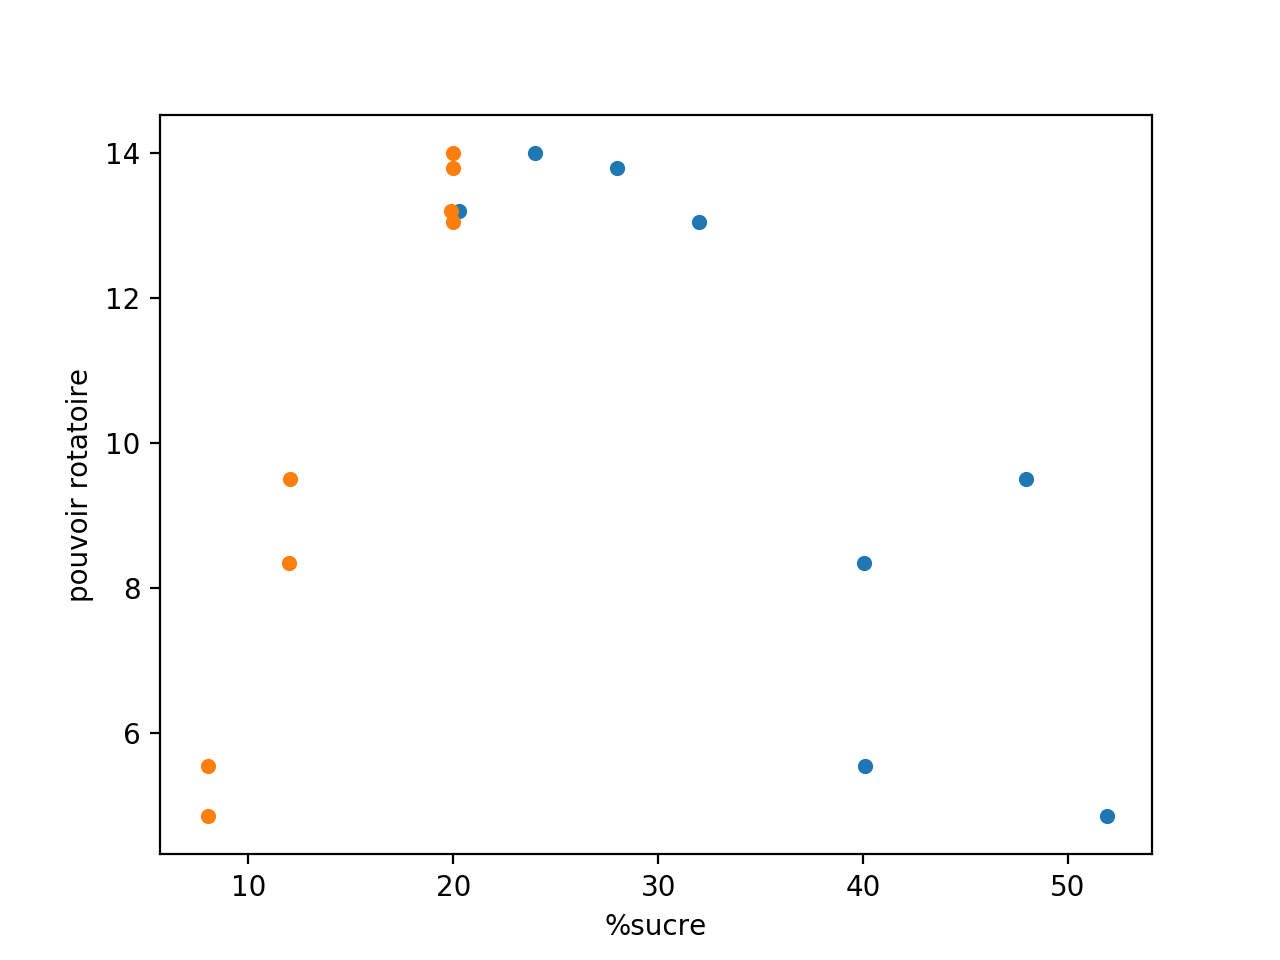

In [16]:
ax = df.plot(x="%EtOH", y="pouvoir rotatoire", kind="scatter")
df.plot(x="%sucre", y="pouvoir rotatoire", kind="scatter", color="C1", ax=ax)

In [10]:
df2 = df[['%eau', '%EtOH', '%sucre', 'densité', 'Indice de réfraction']]
df2.columns = ["eau", "EtOH", "sucre", "densite", "n"]
df2

eau    EtOH   sucre  densite      n
n° solution                                        
1            59.865  20.255  19.881    1.169  1.375
2            56.058  23.973  19.969    1.157  1.377
3            52.022  27.981  19.998    1.143  1.379
4            48.031  31.974  19.995    1.129  1.381
5            44.404  35.724  19.872    1.115  1.382
6            40.057  40.002  19.941    1.102  1.382
7            36.022  44.012  19.966    1.089  1.381
8            32.063  47.939  19.998    1.077  1.383
9            40.059  51.902   8.039    0.945  1.369
10           40.000  47.966  12.034    0.992  1.373
11           40.207  43.842  15.952    1.044  1.378
12           39.954  36.005  24.041    1.168  1.389
13           39.965  32.021  28.015    1.241  1.393
14           39.984  28.166  31.850    1.321  1.398
15           51.856  40.105   8.039    0.974  1.366
16           47.982  40.036  11.982    1.013  1.371
17           44.150  39.832  16.018    1.057  1.377
18           35.997  39.920  24.083    1.155  1.389
19           32.083  39.978  27.939    1.208  1.394

# 3D plot

## Indice de réfraction

In [13]:
trace = go.Scatter3d(
    x=df["%EtOH"],
    y=df["%sucre"],
    z=df['Indice de réfraction'],
    mode='markers',
    marker=go.Marker(
        color=df['Indice de réfraction'],
        colorscale="Viridis",
        colorbar=dict(title="n")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Indice de refraction', 
    scene=dict(
        xaxis=dict(title="%EtOH"),
        yaxis=dict(title="%sucre"),
        zaxis=dict(title="n")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# Ternary plot

Tout frais de la dernière version, ça date de fin avril.

## Indice de réfraction

In [11]:
trace = go.Scatterternary(
    a=df["%EtOH"],
    b=df["%sucre"],
    mode='markers',
    marker=go.Marker(
        size=20,
        color=df['densité'],
        colorscale="Viridis",
        colorbar=dict(title="d")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='densité', 
    ternary=dict(
        sum=100,
        aaxis=dict(title="%EtOH"),
        baxis=dict(title="%sucre"),
        caxis=dict(title="%eau")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# Contours

In [16]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

## Fit data with splines

In [17]:
# set up the grid
nptsx, nptsy = 50, 50
xn, yn = sp.mgrid[df2.EtOH.min():df2.EtOH.max():nptsx * 1j,
                  df2.sucre.min():df2.sucre.max():nptsy * 1j]

# fit surface for densite
dens_spl = SmoothBivariateSpline(df2.EtOH, df2.sucre, df2.densite, kx=1, ky=2)
print("residus densite = ", dens_spl.get_residual())
dens_spline = dens_spl(xn[:, 0], yn[0, :])

dens_spl2 = SmoothBivariateSpline(df2.EtOH, df2.sucre, df2.densite, kx=2, ky=2)
print("residus densite2 = ", dens_spl2.get_residual())
dens_spline2 = dens_spl2(xn[:, 0], yn[0, :])

# fit surface for n
n_spl = SmoothBivariateSpline(df2.EtOH, df2.sucre, df2.n, kx=1, ky=2)
print("residus n = ", n_spl.get_residual())
n_spline = n_spl(xn[:, 0], yn[0, :])

residus densite =  7.75072346319302e-06
residus densite2 =  1.3647571831435493e-06
residus n =  1.700698151276592e-05


<IPython.core.display.Javascript object>


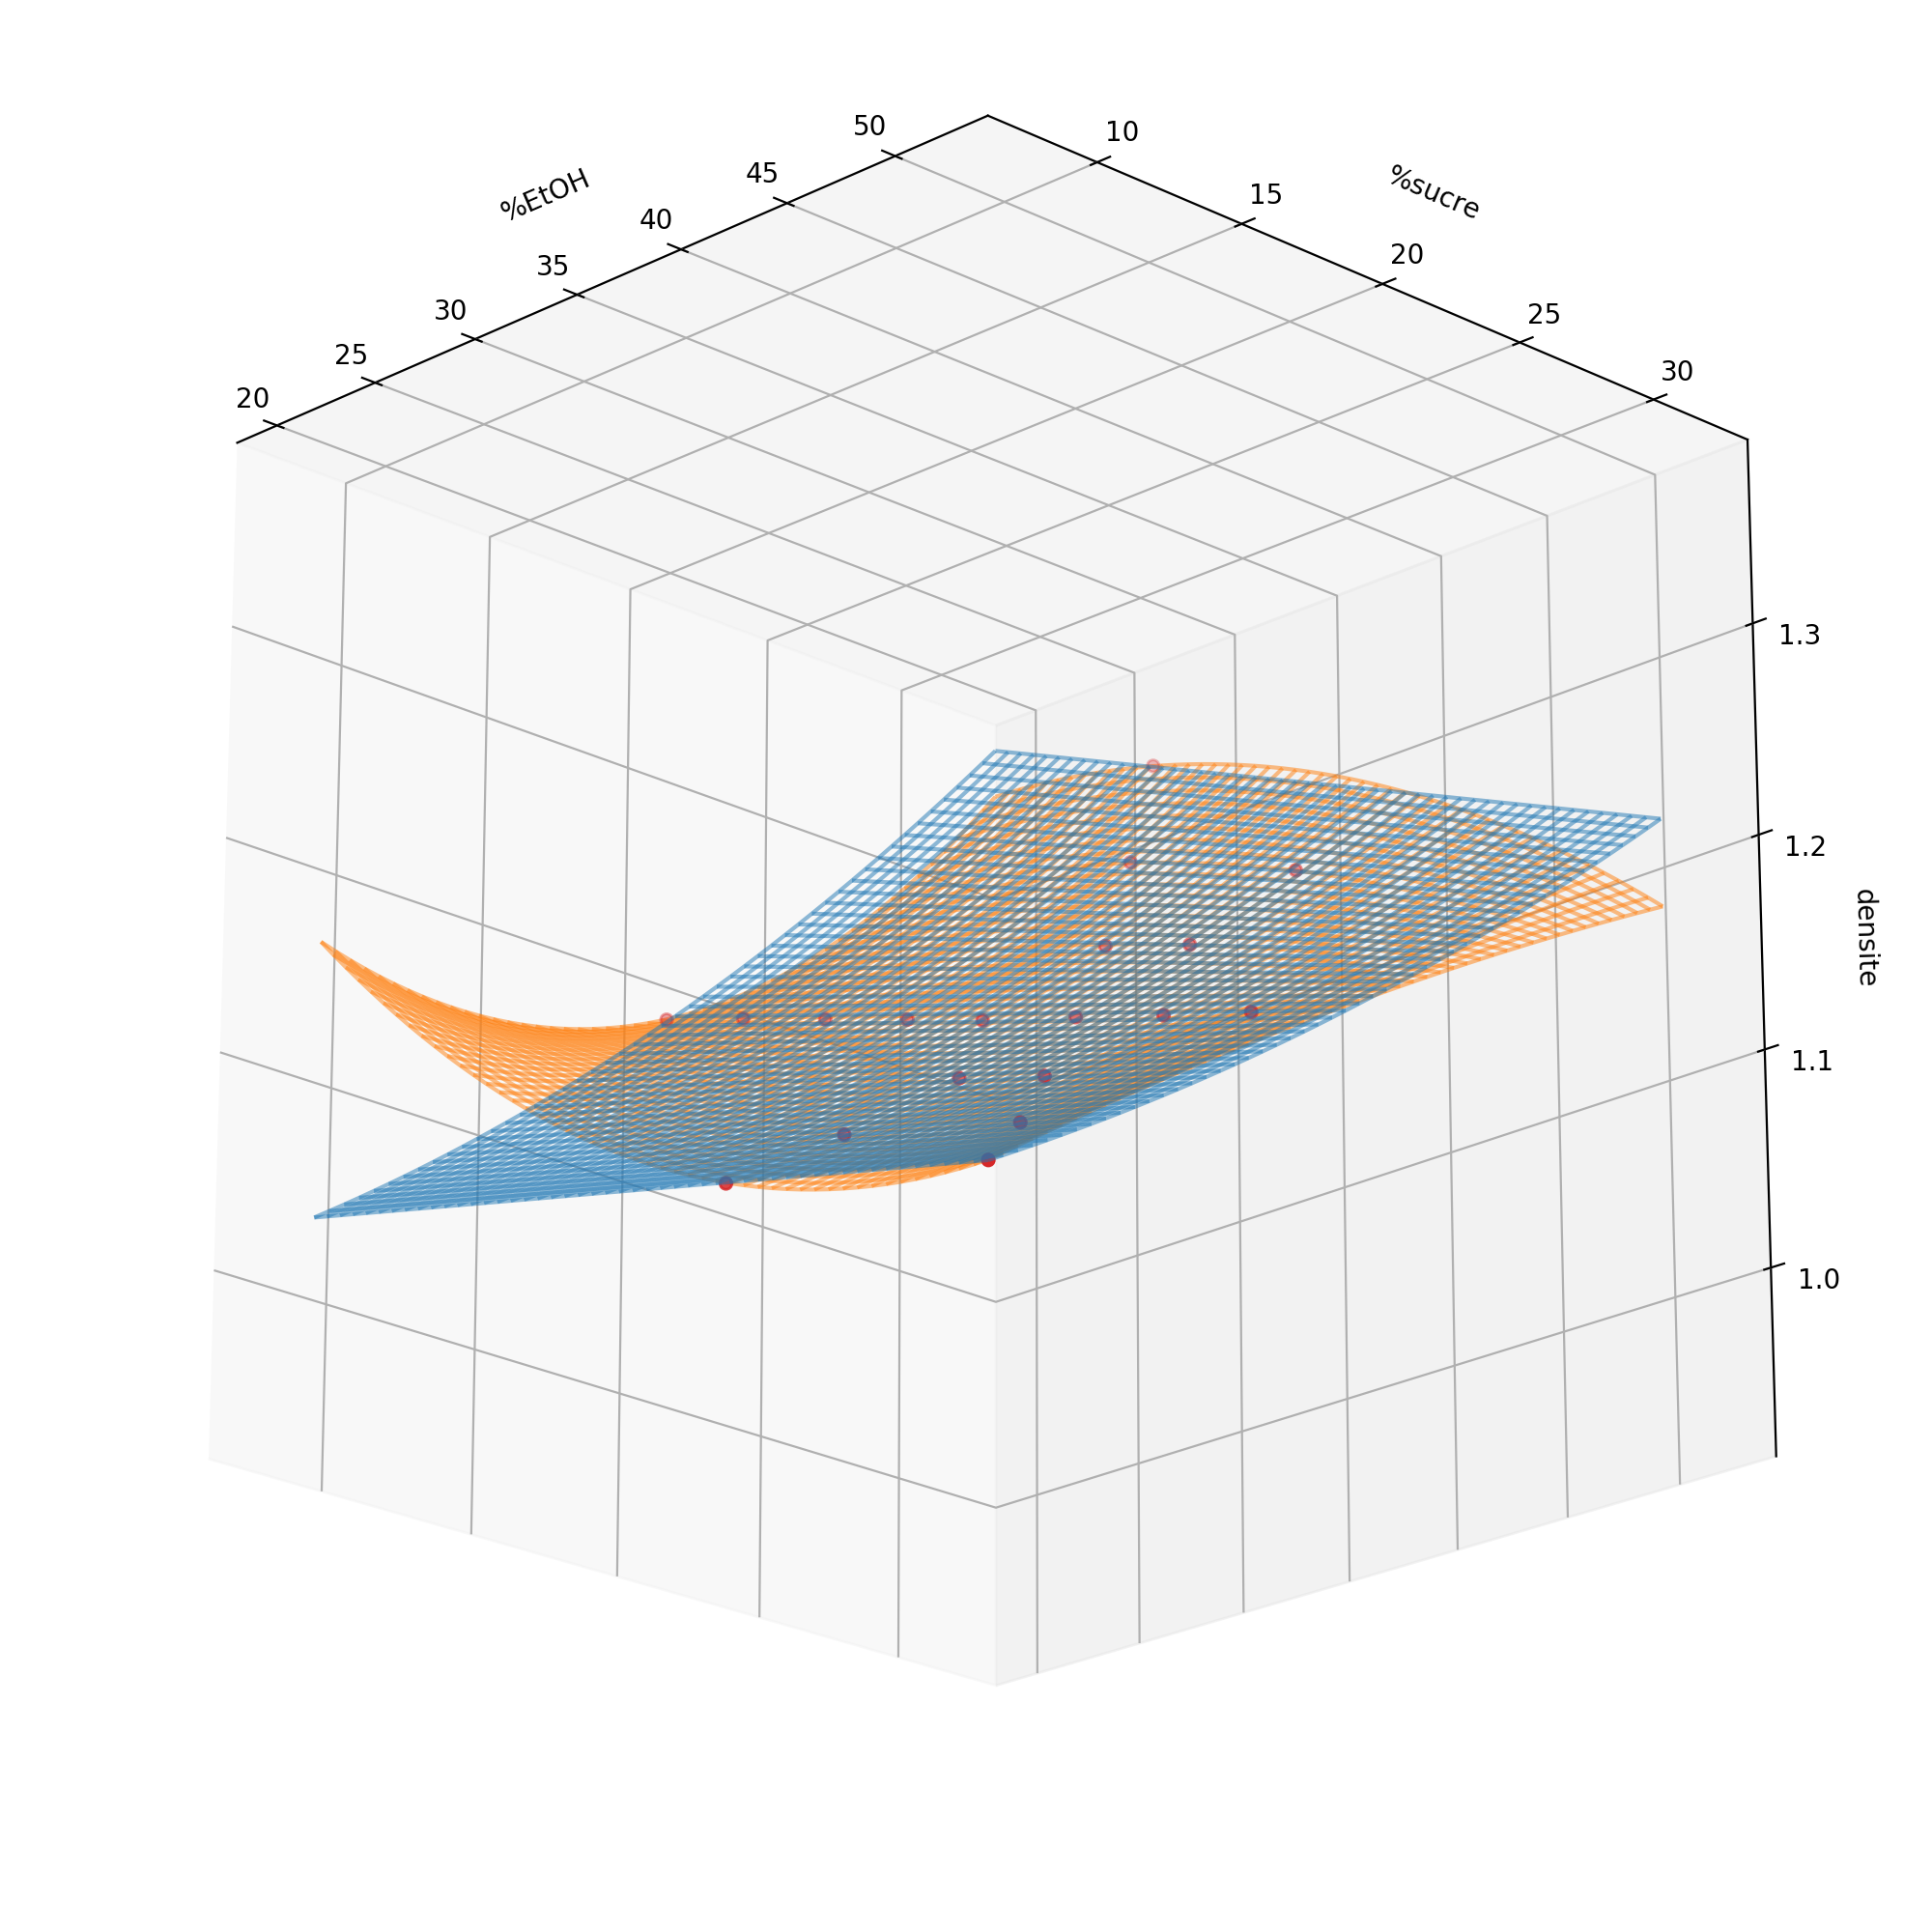

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
ax = Axes3D(fig)
ax.set_xlabel("%EtOH")
ax.set_ylabel("%sucre")
ax.set_zlabel("densite")
ax.scatter(df2.EtOH, df2.sucre, df2.densite, color="C3")
ax.plot_wireframe(xn, yn, dens_spline, colors="C0", alpha=.5)
ax.plot_wireframe(xn, yn, dens_spline2, colors="C1", alpha=.5)

<IPython.core.display.Javascript object>


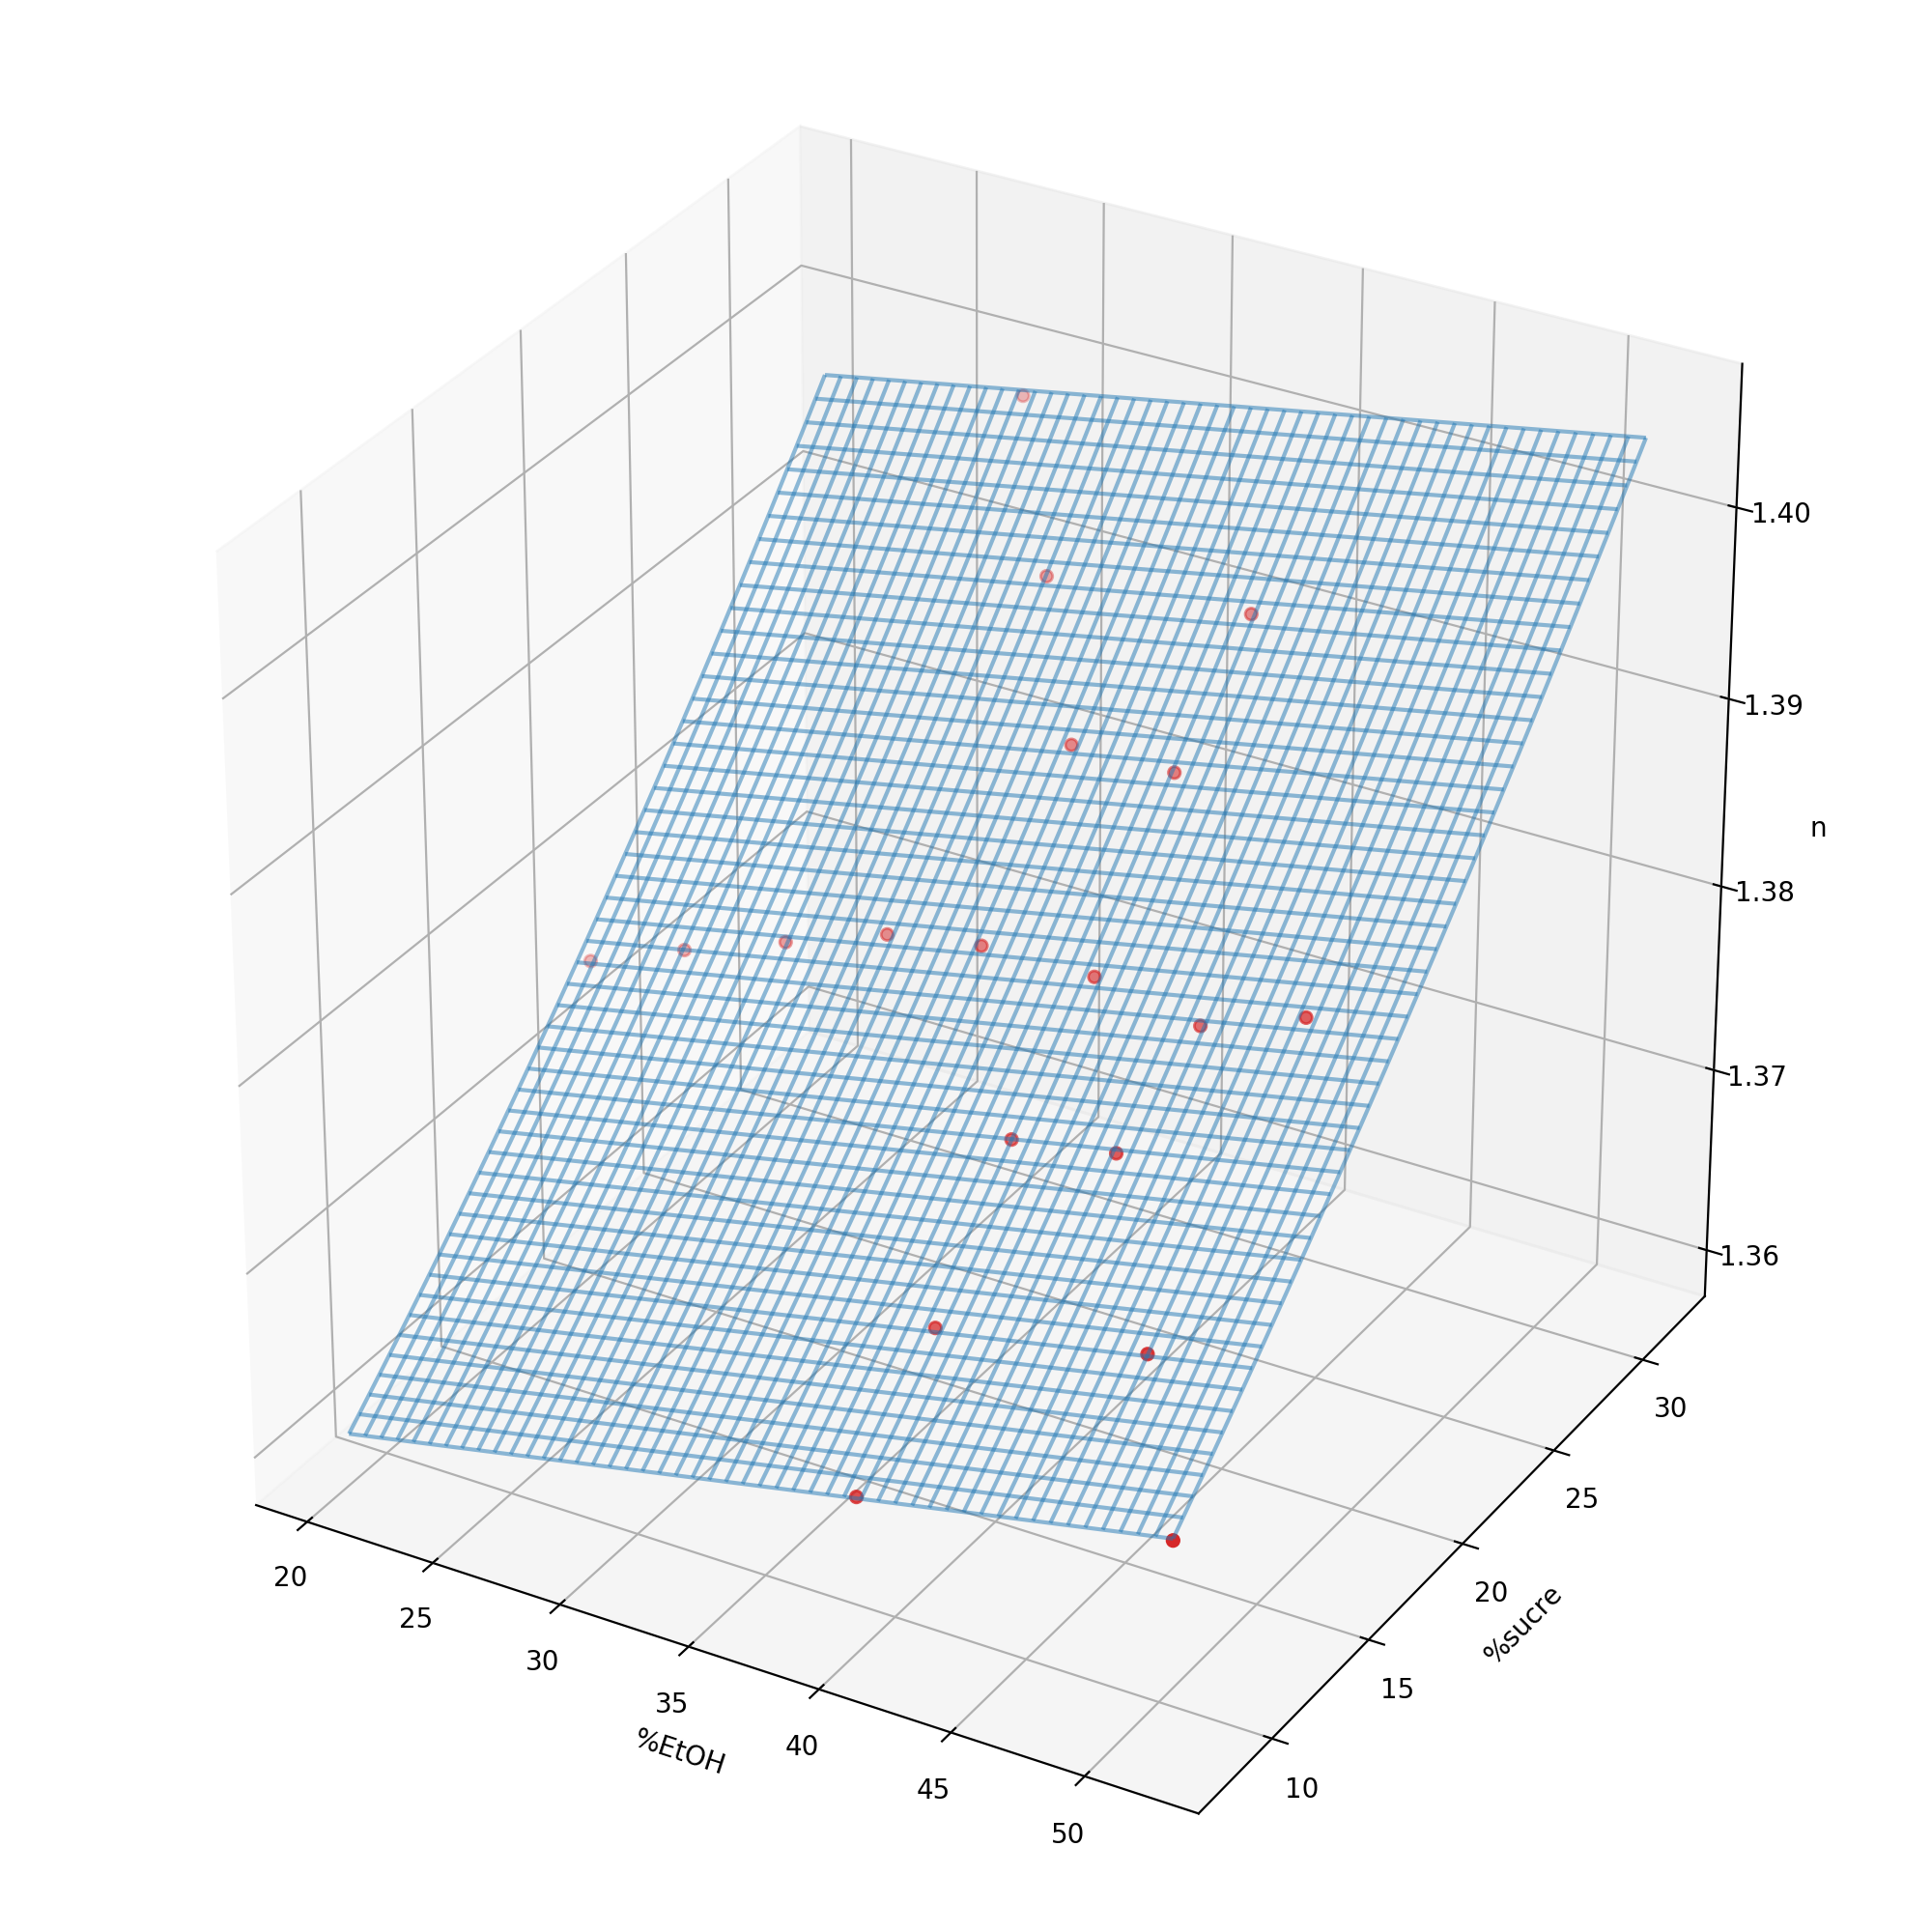

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
ax = Axes3D(fig)
ax.set_xlabel("%EtOH")
ax.set_ylabel("%sucre")
ax.set_zlabel("n")
ax.scatter(df2.EtOH, df2.sucre, df2.n, color="C3")
ax.plot_wireframe(xn, yn, n_spline, colors="C0", alpha=.5)

## Plot contours

In [21]:
df2.n.max(), df2.n.min()

(1.3980000000000001, 1.3659999999999999)

In [22]:
df2.densite.max(), df2.densite.min()

(1.321, 0.945)

In [34]:
df2.EtOH.max(), df2.EtOH.min()

(51.902, 20.255)

In [35]:
df2.sucre.max(), df2.sucre.min()

(31.85, 8.039)

<IPython.core.display.Javascript object>


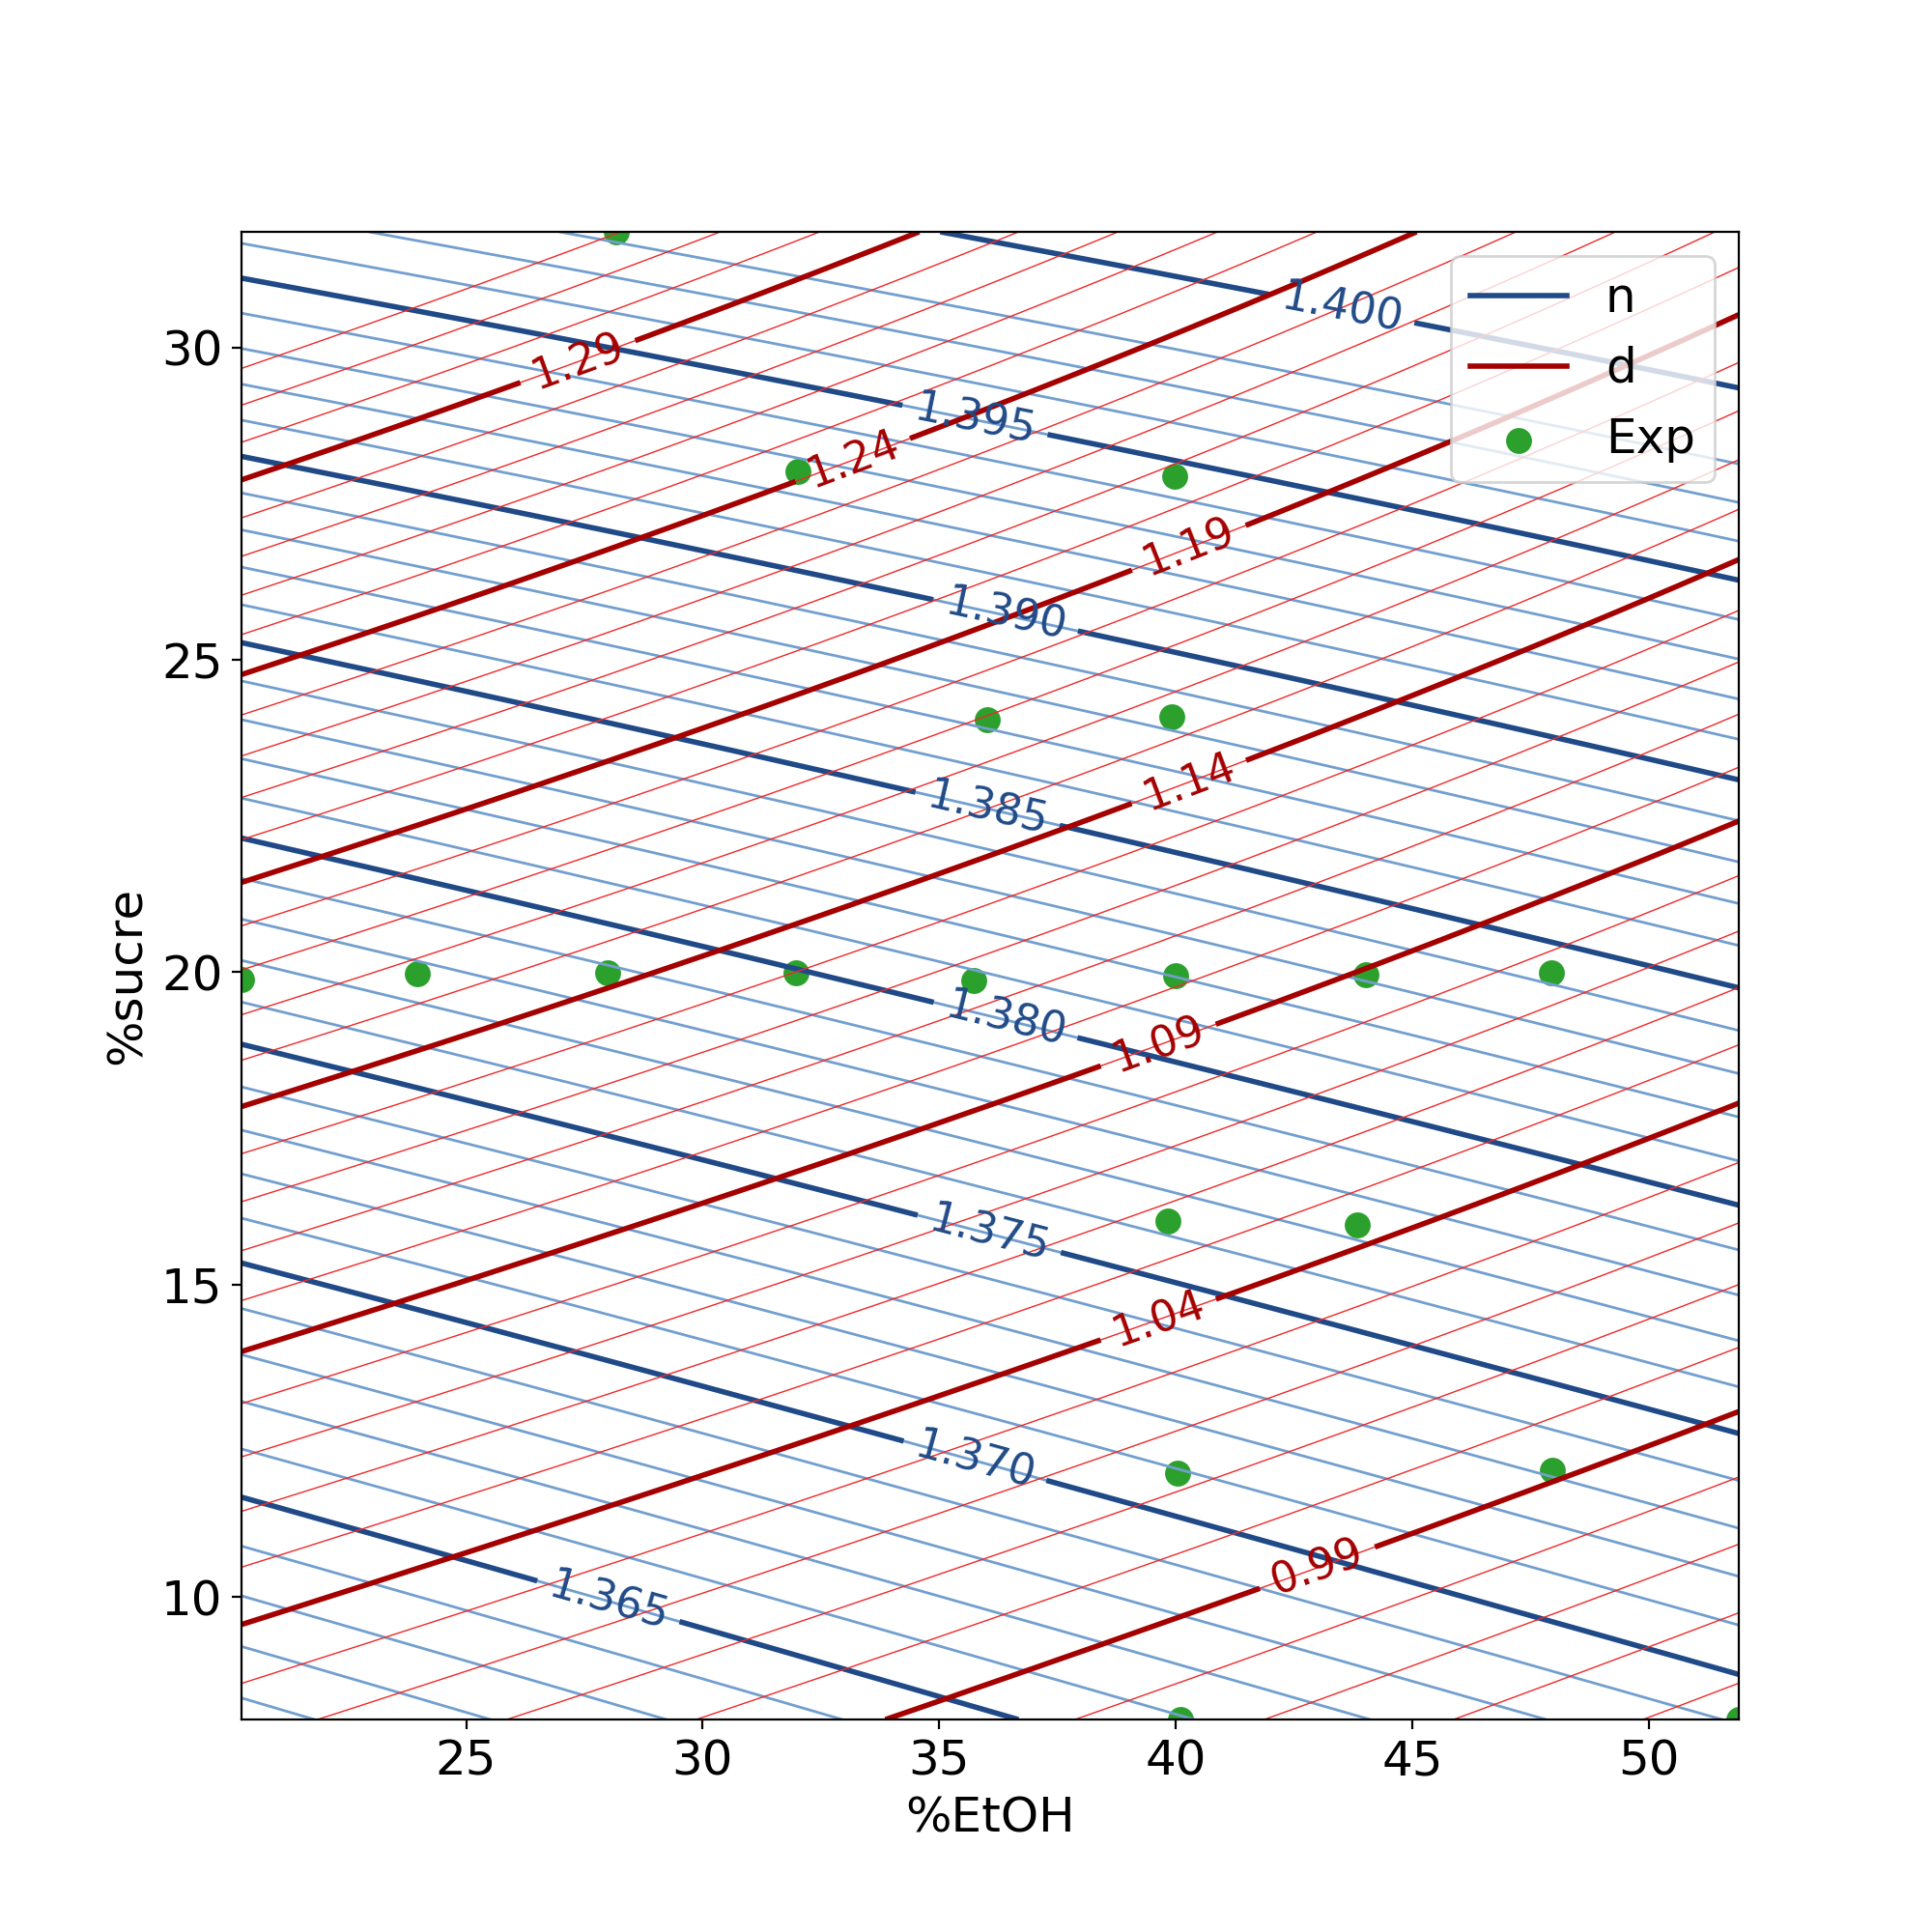

In [17]:
# figure set up
fig = plt.figure(figsize=(10, 10))
font = {'size': 18}
plt.rc('font', **font)
plt.grid(False)

# contours for n
# secondaire
levels = sp.arange(1.35, df2.n.max(), 0.001)
nCS = plt.contour(xn, yn, n_spline, levels=levels, colors="#729fcf", linewidths=1)
# principal
levels = sp.arange(1.35, df2.n.max() + 0.005, 0.005)
nCS = plt.contour(xn, yn, n_spline, levels=levels, colors="#204a87", label="n", linewidths=2)
plt.clabel(nCS, inline=1, fontsize=16)

# contours for densite
# secondaire
alevels = sp.arange(0.94, df2.densite.max(), 0.01)
aCS = plt.contour(xn, yn, dens_spline, levels=alevels, colors="#ef2929", linewidths=.5)
# principal
alevels = sp.arange(0.94, df2.densite.max(), 0.05)
aCS = plt.contour(xn, yn, dens_spline, levels=alevels, colors="#a40000", label="d", linewidths=2)
plt.clabel(aCS, inline=1, fontsize=16, fmt="%.2f")

# layout and axes
#plt.title("Indice de réfraction et pouvoir rotatoire")
plt.xlabel("%EtOH")
plt.ylabel("%sucre")

# experimental data
exp = plt.scatter(df2.EtOH, df2.sucre, color="C2", s=75, label="Exp")

# legend
obj = [plt.Line2D([0, 1], [0, 0], color="#204a87", linewidth=2),
       plt.Line2D([0, 1], [0, 0], color="#a40000", linewidth=2),
       exp]
plt.legend(obj, ["n", "d", "Exp"])

plt.xlim(20.25, 51.9)
plt.ylim(8.04, 31.85)
plt.savefig("rhum.png", dpi=300)
plt.savefig("rhum.pdf")

In [12]:
import seaborn as sns

<IPython.core.display.Javascript object>


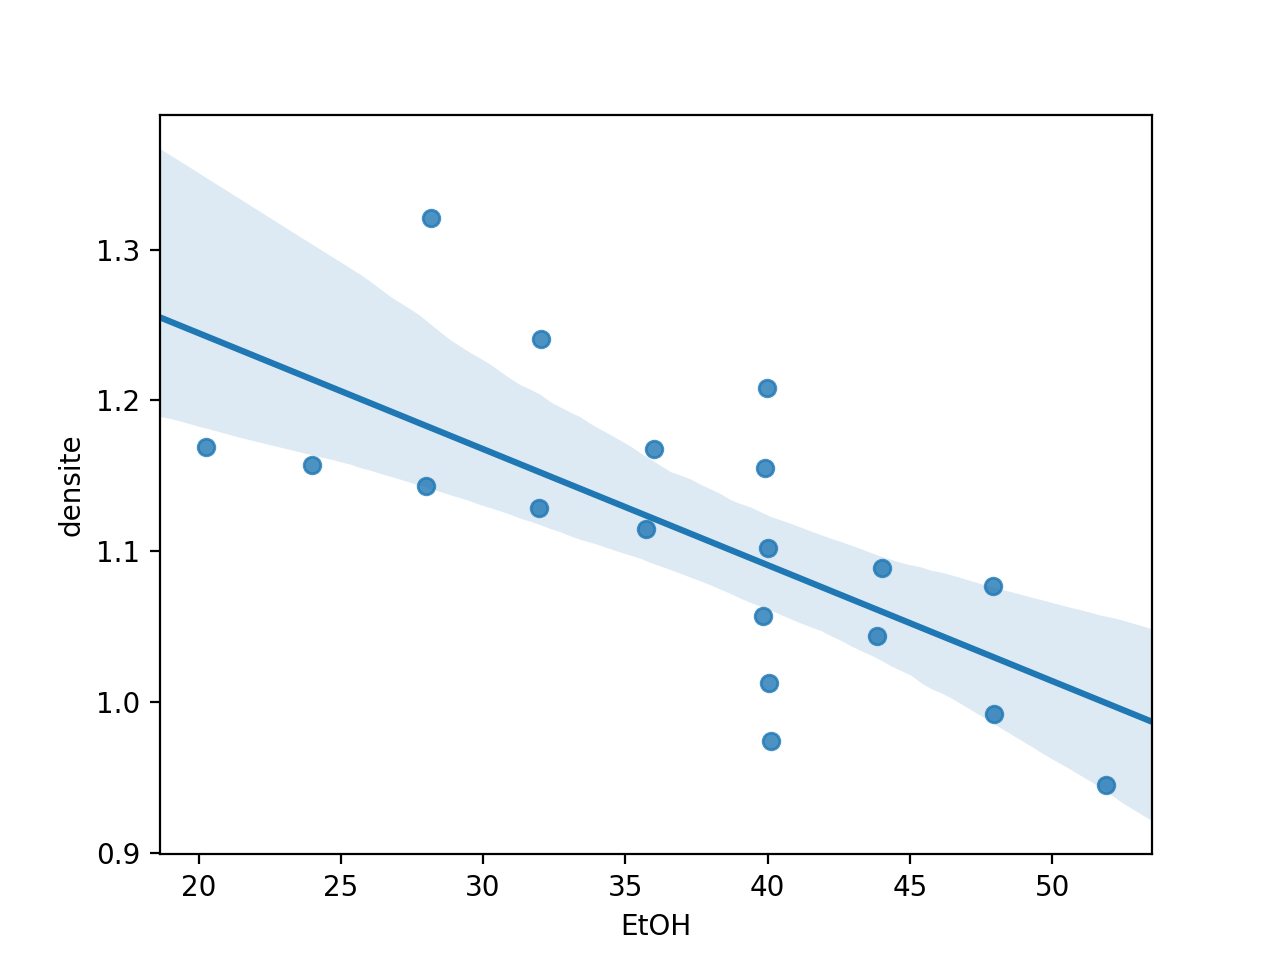

In [15]:
sns.regplot(x="EtOH", y="densite", data=df2)

<IPython.core.display.Javascript object>


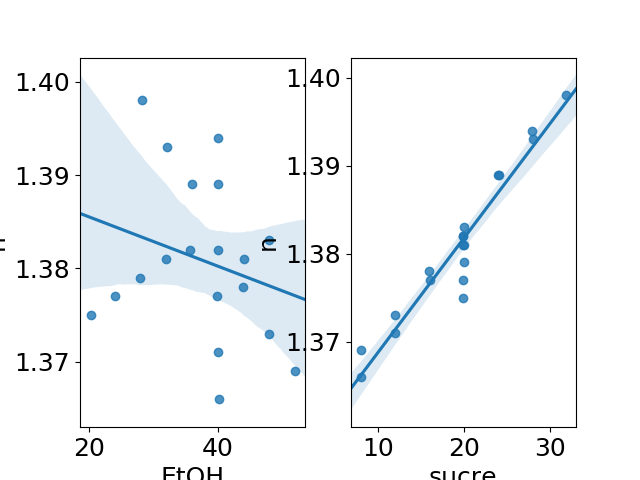

In [51]:
ax = plt.subplot(121)
sns.regplot(x="EtOH", y="n", data=df2, ax=ax)
ax = plt.subplot(122)
sns.regplot(x="sucre", y="n", data=df2, ax=ax)

## Inverse

In [25]:
df2.head()

eau    EtOH   sucre  densite      n
n° solution                                         
1             59.865  20.255  19.881    1.169  1.375
2             56.058  23.973  19.969    1.157  1.377
3             52.022  27.981  19.998    1.143  1.379
4             48.031  31.974  19.995    1.129  1.381
5             44.404  35.724  19.872    1.115  1.382

In [48]:
# set up the grid
nptsx, nptsy = 50, 50
xn, yn = sp.mgrid[df2.densite.min():df2.densite.max():nptsx * 1j,
                  df2.n.min():df2.n.max():nptsy * 1j]

xp, yp = sp.mgrid[0.9:1.38:nptsx * 1j,
                  1.365:1.4:nptsy * 1j]

# fit surface for EtOH
etOH_spl = SmoothBivariateSpline(df2.densite, df2.n, df2.EtOH, kx=2, ky=1, s=50)
print("residus EtOH = ", etOH_spl.get_residual())
etOH_spline = etOH_spl(xn[:, 0], yn[0, :])

# fit surface for sucre
sucre_spl = SmoothBivariateSpline(df2.densite, df2.n, df2.sucre, kx=1, ky=2)
print("residus sucre = ", sucre_spl.get_residual() / df2.sucre.mean())
sucre_spline = sucre_spl(xn[:, 0], yn[0, :])

residus EtOH =  30.869607246978738
residus sucre =  0.09225335169522904


<IPython.core.display.Javascript object>


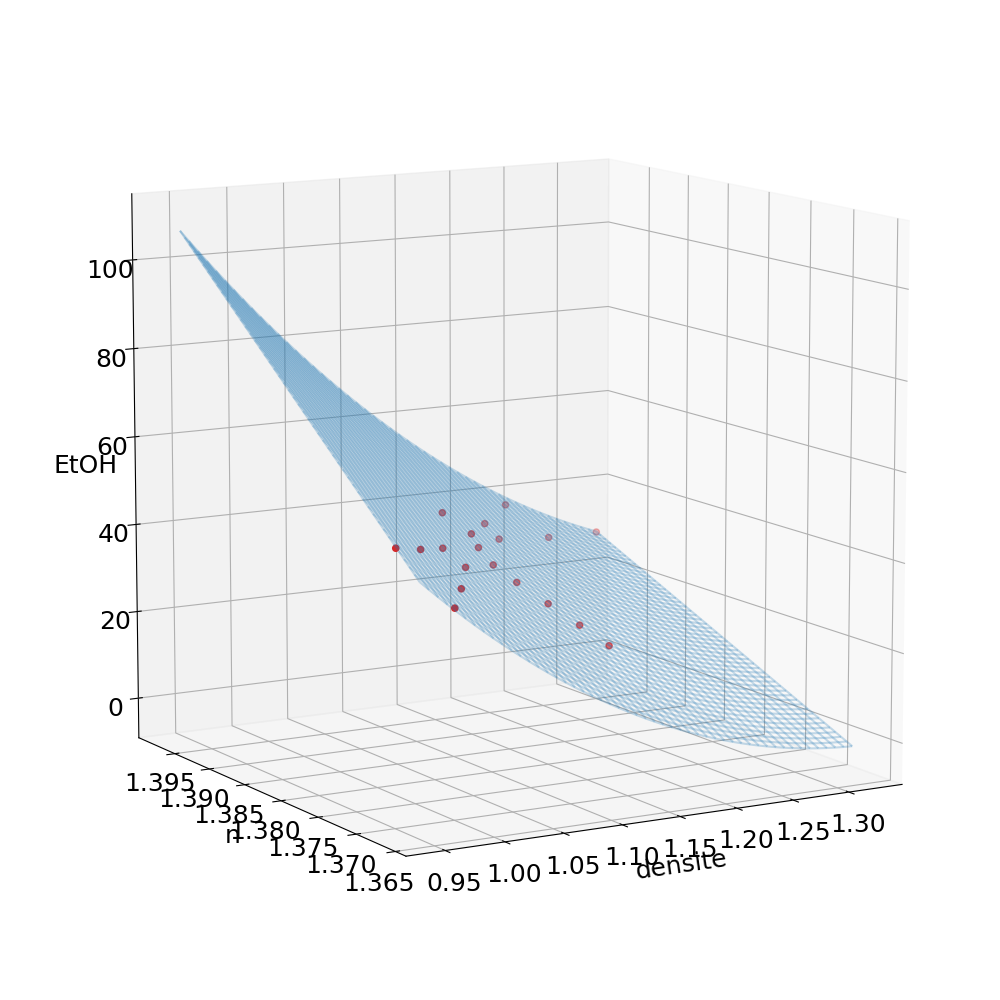

In [44]:
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
ax = Axes3D(fig)
ax.set_xlabel("densite")
ax.set_ylabel("n")
ax.set_zlabel("EtOH")
ax.scatter(df2.densite, df2.n, df2.EtOH, color="C3")
ax.plot_wireframe(xn, yn, etOH_spline, colors="C0", alpha=.25)

<IPython.core.display.Javascript object>


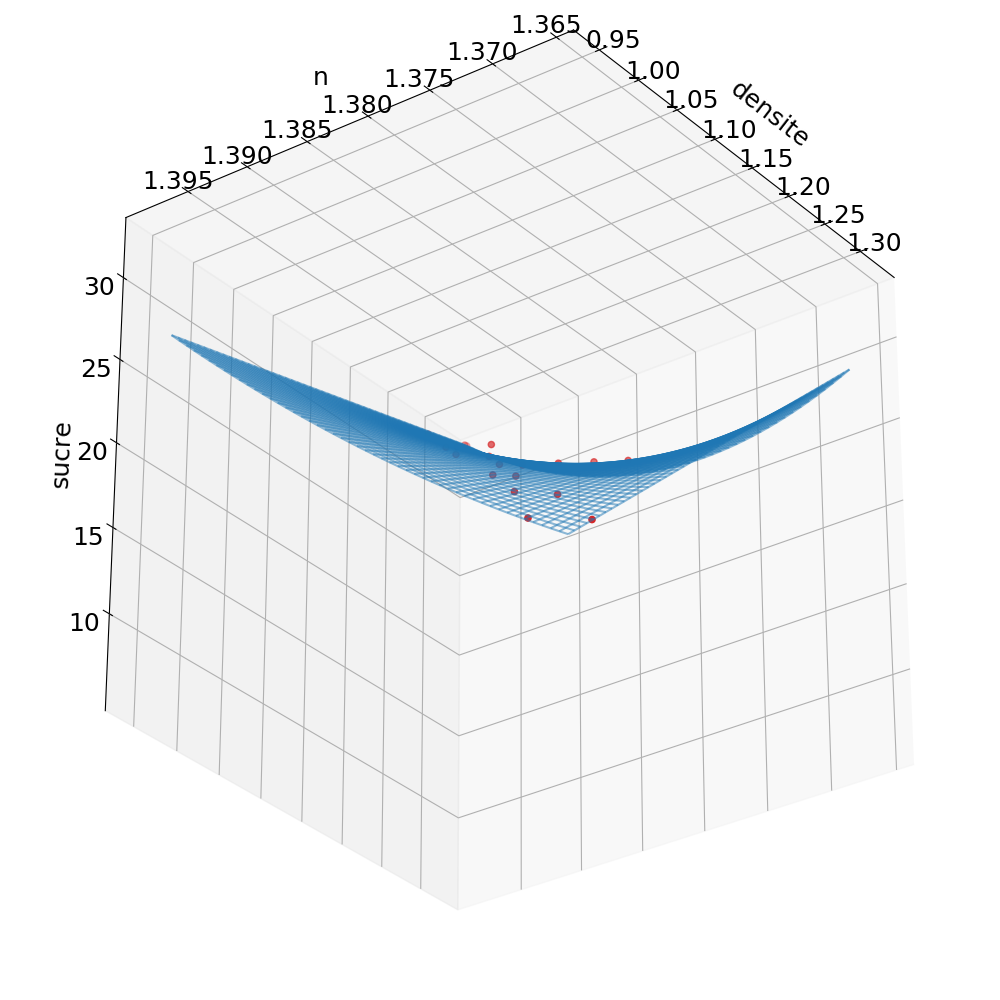

In [39]:
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
ax = Axes3D(fig)
ax.set_xlabel("densite")
ax.set_ylabel("n")
ax.set_zlabel("sucre")
ax.scatter(df2.densite, df2.n, df2.sucre, color="C3")
ax.plot_wireframe(xn, yn, sucre_spline, colors="C0", alpha=.5)

    xtick.direction     : in
    xtick.top           : True
    xtick.major.width   : 2
    xtick.major.size    : 10
    xtick.minor.visible : True
    xtick.minor.width   : 2
    xtick.minor.size    : 5

    ytick.direction     : in
    ytick.right         : True
    ytick.major.width   : 2
    ytick.major.size    : 10
    ytick.minor.visible : True
    ytick.minor.width   : 2
    ytick.minor.size    : 5

In [19]:
rhums = np.array([[0.936, 1.3715], [1.023, 1.3772]])

<IPython.core.display.Javascript object>


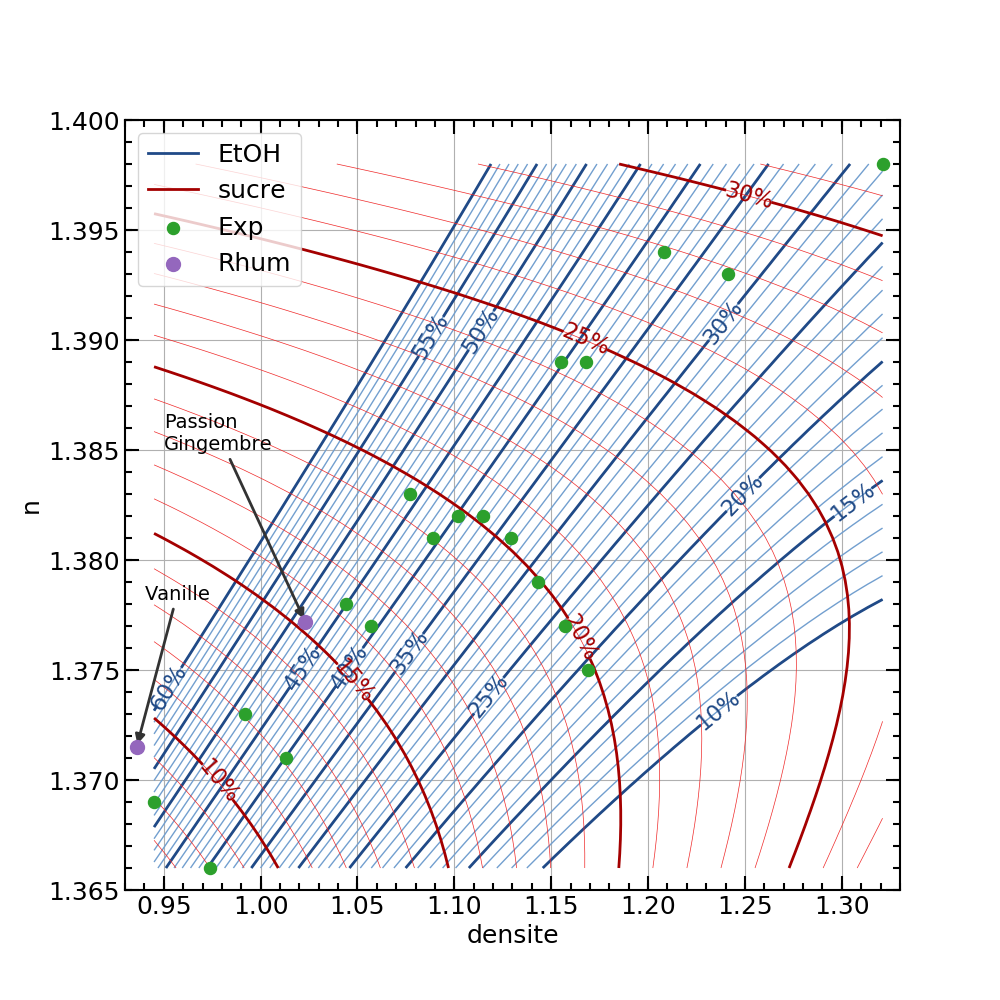

/Users/gvallver/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning:

The following kwargs were not used by contour: 'label'



In [75]:
# figure set up
fig = plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 1.5
plt.grid(True)

# contours for EtOH
# secondaire
levels = sp.arange(10, df2.EtOH.max() + 9, 1)
nCS = plt.contour(xn, yn, etOH_spline, levels=levels, colors="#729fcf", linewidths=1)
# principal
levels = sp.arange(10, df2.EtOH.max() + 9, 5)
nCS = plt.contour(xn, yn, etOH_spline, levels=levels, colors="#204a87", linewidths=2)
plt.clabel(nCS, inline=1, fontsize=16, fmt="%.0f%%")

# contours for sucre
# secondaire
alevels = sp.arange(5, df2.sucre.max(), 1)
aCS = plt.contour(xn, yn, sucre_spline, levels=alevels, colors="#ef2929", linewidths=.5)
# principal
alevels = sp.arange(5, df2.sucre.max() + 5, 5)
aCS = plt.contour(xn, yn, sucre_spline, levels=alevels, colors="#a40000", label="d", linewidths=2)
plt.clabel(aCS, inline=1, fontsize=16, fmt="%.0f%%")

# layout and axes
#plt.title("Indice de réfraction et pouvoir rotatoire")
plt.xlabel("densité")
plt.ylabel("n")

# experimental data
exp = plt.scatter(df2.densite, df2.n, color="C2", s=75, label="Exp", zorder=100)

# experimental data
r = plt.scatter(rhums[:, 0], rhums[:, 1], color="C4", s=100, label="Rhum", zorder=100)
plt.annotate("Vanille", rhums[0, :], xytext=(0.94, 1.3782), fontsize=14,
             arrowprops=dict(arrowstyle="-|>", color="#333333", linewidth=2))
plt.annotate("Passion\nGingembre", rhums[1, :], xytext=(0.95, 1.385), fontsize=14,
             arrowprops=dict(arrowstyle="-|>", color="#333333", linewidth=2))

#plt.text(rhums[0, 0], rhums[0, 1], "Vanille")
#plt.text(rhums[1, 0], rhums[1, 1], "Passion\nGingembre")


# legend
obj = [plt.Line2D([0, 1], [0, 0], color="#204a87", linewidth=2),
       plt.Line2D([0, 1], [0, 0], color="#a40000", linewidth=2),
       exp, r]
plt.legend(obj, ["EtOH", "sucre", "Exp", "Rhum"])

plt.ylim(1.365, 1.4)
plt.xlim(0.93, 1.33)

ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.001))
ax.tick_params(axis="both", which="both", direction="in", width=1.5, 
               bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="both", which="major", size=10)
ax.tick_params(axis="both", which="minor", size=5)

#plt.savefig("rhum_inv_mauvais.png", dpi=300)
#plt.savefig("rhum_inv_mauvais.pdf")
plt.savefig("rhum_inv.png", dpi=300)
plt.savefig("rhum_inv.pdf")